# Introduzione all'Intelligenza Artificiale
## Supporto per le esercitazioni - Ricerca locale

Questo notebook rappresenta una guida all'implementazione e utilizzo dei principali algoritmi e modelli presentati nell'ambito del corso "Introduzione all'Intelligenza Artificiale", corso di Laurea in Informatica, Università di Pisa, anno accademico 2024/2025.

Il codice presentato di seguito è un'implementazione delle funzioni riportate nel testo di riferimento del corso:
S. Russell, P. Norvig, "Artificial Intelligence: A Modern Approach, Pearson, 4th Edition, 2020

Ulteriori risorse possono essere reperite online all'indirizzo: https://github.com/aimacode

Questo notebook contiene degli esempi di utilizzo degli algoritmi di ricerca implementati in $\texttt{local_search.py}$.<br/>
Di seguito, l'implementazione di alcuni problemi di esempi e l'esecuzione degli algoritmi.

## Problemi di esempio
Per rappresentare un'istanza di un problema concreto, occorre specializzare la classe $\texttt{Problem}$ implementata in $\texttt{utils.py}$.<br/>
È necessario almeno implementare le funzioni $\texttt{actions()}$ e $\texttt{result()}$.

In [ ]:
!git clone https://github.com/luigiquara/IIA-python.git
%cd IIA-python/src
from utils import Problem

Cloning into 'IIA-python'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 145 (delta 74), reused 70 (delta 29), pack-reused 0 (from 0)
Receiving objects: 100% (145/145), 91.54 KiB | 4.36 MiB/s, done.
Resolving deltas: 100% (74/74), done.
/content/IIA-python/src


### Labirinto di Teseo
In figura viene rapprensentato il problema "Il labirinto di Teseo".

![][image1]

[image1]: <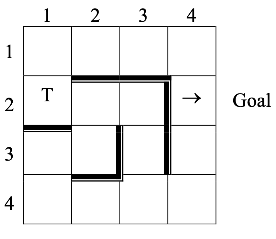>

Viene riportata l'implementazione del problema $\texttt{Labirinto_Teseo}$, insieme alla versione adattata per gli algoritmi di ricerca locale $\texttt{Labirinto_Teseo_Local}$.<br/>
In questa versione viene implementato il metodo $\texttt{value()}$, che restituisce il valore di ogni nodo nell'albero di ricerca. Questo valore viene utilizzato dagli algoritmi di ricerca locale per determinare il prossimo nodo da selezionare.

In [ ]:
class Labirinto_Teseo(Problem):

    # Definizione di un costruttore custom
    # Oltre allo stato iniziale e l'obiettivo, vengono definite le possibili azioni
    # È possibile indicare l'ordine con il quale vengono prese in considerazione le azioni
    def __init__(self, initial_state='(2,1)', goal_state='(2,4)', possible_actions=['UP', 'DOWN', 'LEFT', 'RIGHT']):
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.possible_actions = possible_actions

    # per ogni casella, restituisce l'insieme delle possibili azioni
    # in base alla conformazione del labirinto
    def actions(self, state):
        # initializza la lista delle possibili azioni
        # e rimuove le azioni che non possono essere eseguite
        possible_actions = self.possible_actions[:]

        if (state == '(2,1)') or (state == '(3,2)') or (state == '(1,2)') or (state == '(1,3)') \
            or (state == '(4,1)') or (state == '(4,2)') or (state == '(4,3)') or (state == '(4,4)'):
            possible_actions.remove('DOWN')

        if (state == '(3,1)') or (state == '(2,2)') or (state == '(2,3)') or (state == '(4,2)') \
           or (state == '(1,1)') or (state == '(1,2)') or (state == '(1,3)') or (state == '(1,4)'):
            possible_actions.remove('UP')

        if (state == '(3,2)') or (state == '(2,3)') or (state == '(3,3)') or \
        (state == '(1,4)') or (state == '(2,4)') or (state == '(3,4)') or (state == '(4,4)'):
            possible_actions.remove('RIGHT')

        if (state == '(4,2)') or (state == '(3,4)') or (state == '(3,3)') or \
        (state == '(1,1)') or (state == '(2,1)') or (state == '(3,1)') or (state == '(4,1)'):
            possible_actions.remove('LEFT')
        return possible_actions

    # Restituisce lo stato che si ottiene una volta eseguita l'azione indicata
    # mentre si è nella casella 'state'
    def result(self, state, action):

        # ottiene le coordinate RIGA - COLONNA corrispondenti a state
        row = int(state[1:2])
        col = int(state[-2:-1])

        if action == 'UP':
            row = row - 1
        elif action == 'DOWN':
            row = row + 1
        elif action == 'RIGHT':
            col = col + 1
        elif action == 'LEFT':
            col = col - 1

        # costruisci la nuova stringa di stato e restituiscila
        new_state = '('+str(row)+','+str(col)+')'
        return new_state

    # Funzione euristica
    # Restituisce l'opposto della profondità del nodo
    # Viene sottratto il costo del cammino, affinchè f = g + h sia uguale a -node.depth
    def h(self, node):
        return -len(node) - node.path_cost


class Labirinto_Teseo_Local(Labirinto_Teseo):
    """Versione del problema del labirinto di Teseo
        in cui e' definita una funzione value da usare
        per algoritmi di ricerca locale."""

    def value(self, node):
        # questa funzione calcola il valore della funzione da massimizzare
        # nel nostro caso e' basata sul numero minimo di mosse da compiere
        # per arrivare alla soluzione

        # calcola row e col dello stato corrispondente al nodo
        row = int(node.state[1:2])
        col = int(node.state[-2:-1])
        # calcola row e col dello stato goal
        row_goal = int(self.goal_state[1:2])
        col_goal = int(self.goal_state[-2:-1])

        return - (abs(row-row_goal) + abs(col-col_goal))

## Esecuzione di algoritmi di ricerca locale

In [ ]:
from local_search import hill_climbing, simulated_annealing

Prima dell'esecuzione degli algoritmi, vengono create le istanze dei problemi.

In [ ]:
teseo_local = Labirinto_Teseo_Local()

teseo1_local = Labirinto_Teseo_Local(possible_actions=['UP','RIGHT','DOWN','LEFT'])
teseo2_local = Labirinto_Teseo_Local(possible_actions=['LEFT','DOWN','RIGHT','UP'])

Proviamo a risolvere i problemi appena definiti con gli algoritmi di ricerca locale

In [ ]:
print('Ricerca hill climbing')
solution = hill_climbing(teseo1_local)
print(solution)
print(solution.path_actions())

Ricerca hill climbing
state: (2,3) - path cost: 2
['RIGHT', 'RIGHT']


In [ ]:
print('Simulated annealing')
solution = simulated_annealing(teseo1_local)
print(solution)
print(solution.path_actions())

Simulated annealing
state: (2,3) - path cost: 8
['UP', 'DOWN', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'LEFT']
